In [1]:
import numpy as np
import os
import image_loader as im
from skimage.transform import resize
from matplotlib import pyplot as plt
from skimage import io
from collections import deque
%matplotlib inline

First we need to 'binarize' the picture we want to embed in the markow field. This function does it

In [2]:
def prep_datas(pic, size):
    X=resize(pic,(size,size)) # reduce the size of the image from 100X100 to 32X32. Also flattens the color levels
    X=np.reshape(X,size**2) # reshape from 32x32 to a flat 1024 vector
    
    X=np.array(X) # transforms it into an array
    
    for j in range(len(X)): # let's binarized the image
        if X[j] < 0.5:
            X[j] = -1
        else:
            X[j] = 1;
            
    X_pic = np.reshape(X,(size,size))    
    
    return X, X_pic

We load and prepare the picture

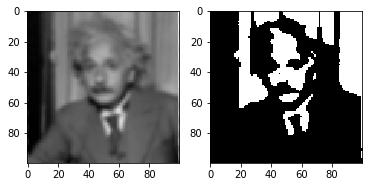

In [34]:
size_lattice = 100 # Size of the lattice in which we want to embed the picture

einstein_pic = io.imread("einstein.png")
training_chain, ein_pic = prep_datas(einstein_pic, size_lattice)

plt.subplot(1,2,1)
plt.imshow(einstein_pic,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ein_pic,cmap='gray')

We now define the spin-spin correlation function for the lattice

In [33]:
def corr(mat, d): # ensemble average of lattice (in form of 1D vector) for d-nearest neigbors spin
    
    item = deque(mat)
    item.rotate(d)
    
    mean = np.correlate(mat, np.asanyarray(item))/len(mat)
    
    return mean 